# To test the number of trees to update to obtain the best performances with IForestASD

Il a été démontré que lors de la détection d'un drift par IForest ASD, cette méthode mets à jour son modèle en supprimant carrément l'existant. Cette manière de faire nous fait perdre l'historique de telle sorte qu'on perd et espace mémoire et en temps d'exécution pour la mise à jour. L'idée de MIForestASD est de réduire la consommation mémoire et le temps d'exécution tout en tenant compte de l'historique des bons comportements du stream. 
Ainsi, MIForest ASD ne mets à jour qu'une partie des arbres du modèle précédemment utilisés.

Deux paramètres sont donc importants pour cette nouvelle version. 
* Paramètre updated_randomly (True par défaut) 
    - Soit on mets à jour le modèle sous le format FIFO c'est-à-dire les anciens arbres sont ceux qu'on supprime du modèle.
    - Soit, on choisi de manière aléatoire un certain nombre d'arbres qu'on retient dans le nouveau modèle.
* Paramètre n_estimators_updated (0.5 par défaut)
    Il s'agit du pourcentage de nouveaux arbres à créer sur la base de la nouvelle fenêtre.
    
En effet, MIForest ASD a tout son sens puisque le drift est détecté après le passage de la fenêtre. Le modèle est donc mis à jour pour les fenêtres suivantes. Ceci implique deux possibilités, il s'agirait peut être d'un cluster de comportements normaux mais unique et donc les autres fenêtres reviendront au comportement normal, on serait obligé de recréer un autre modèle ainsi de suite.

Vu le caractère aléatoire des deux méthodes, pour chaque jeu de données, on fait un certain nombre d'exécution avec les mêmes paramètres et la moyenne des résultats est donc consignée avec la variance.

## Install skmultiflow if needed
You need to install git

In [13]:
#print("scikit-multiflow package installation")
#!pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

In [14]:
try:
    import skmultiflow
except ImportError as e:
    print("scikit-multiflow package installation")
    !pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

## Importations and configurations

In [15]:
%matplotlib notebook
import matplotlib as plt
plt.interactive(True)
from source import functions
func = functions.Comparison()
import datetime
import numpy as np
#from skmultiflow.data import AnomalySineGenerator

## General parameters for the evaluation

In [16]:
#************************ Execution settings *******************************
#window_sizes = [50, 100, 500, 1000]
#n_estimators = [30, 50, 100]
window = 100 # Number of sample in one window, window size.
n_estimator = 30 # Number of itree in the random forest
execution_number = 1 # Number of execution because of the random character of IForest
anomaly_threshold = 0.5 # Anomaly threshold to decide which is anomaly or not
max_sample = 1000 # Total size of data to examine (windows number = max_sample/window)
n_wait = max_sample # The evaluation step size
# Used metric in the evaluation. Attention to use the metrics availlable in skmultiflow
metrics=['accuracy', 'f1', 'precision', 'recall', 'true_vs_predicted', 'kappa', 'kappa_m', 'running_time', 'model_size']

#************************ Stream data settings *******************************
window_number = round((max_sample/window),0) # The number of window to save on .csv file
#Parameters to partially update the model
n_estimators_updated=np.arange(0, 1, 0.1)
updated_randomly=True


## Execution Function

In [17]:
def execute_comparision(file_path):
    for estimators_updated in n_estimators_updated:
        stream, stream2, stream3 = func.get_file_stream2(path=file_path)
        print("")
        print("******************************** n_estimators_updated = "+ str(estimators_updated)+" and Window = "+str(window)+" and n_estimator = "+str(n_estimator)+" ********************************")
        result_folder_path = func.run_MIForestASD(execution_number=execution_number, stream=stream3, stream_n_features=stream.n_features, window = window, 
                         estimators = n_estimator, anomaly = anomaly_threshold, drift_rate = drift_rate, 
                         result_folder=test_name, max_sample=max_sample, n_wait=n_wait, metrics=metrics,
                         n_estimators_updated=estimators_updated, updated_randomly=updated_randomly)
        #test.append([estimators_updated])
    #results= pd.DataFrame(test, columns=["estimators_updated (%)"])
    #print(results)
    execution_results, updated_results = func.merge_file2(folder_path=result_folder_path, output_file = 'output',skiprows=(1 + 4))
    #func.print_graphics(execution_resuts=execution_results, updated_results=updated_results)

## Applied On Simple Stream Dataset


Please find the data used on results/Generator_2020-12-03 15:50:13.035517/Generator_2020-12-03 15:50:13.035517_dataUsed.csv

******************************** n_estimators_updated = 0.0 and Window = 100 and n_estimator = 30 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


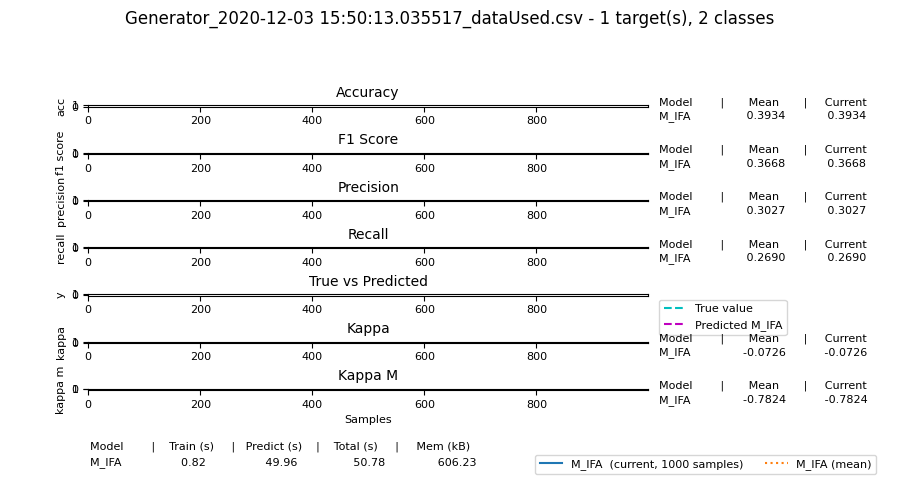

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.01s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ####---------------- [20%] [5.60s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ######-------------- [30%] [11.15s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ########------------ [40%] [16.67s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##########---------- [50%] [22.44s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ############-------- [60%] [27.96s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##############------ [70%] [33.48s]
The model was partially updated by training a sub new iForest with the version : MAnomaly

<IPython.core.display.Javascript object>


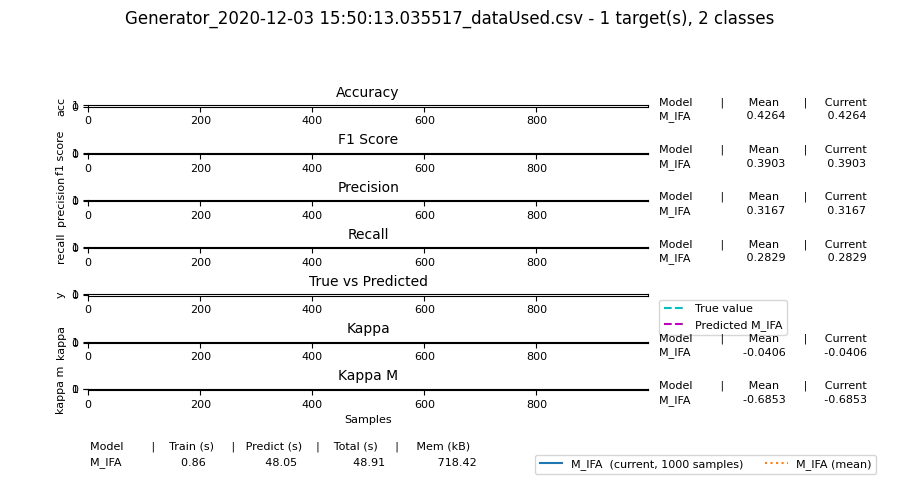

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.01s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ####---------------- [20%] [6.10s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ######-------------- [30%] [11.72s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ########------------ [40%] [17.70s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##########---------- [50%] [23.91s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ############-------- [60%] [29.22s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##############------ [70%] [34.01s]
The model was partially updated by training a sub new iForest with the version : MAnomaly

<IPython.core.display.Javascript object>


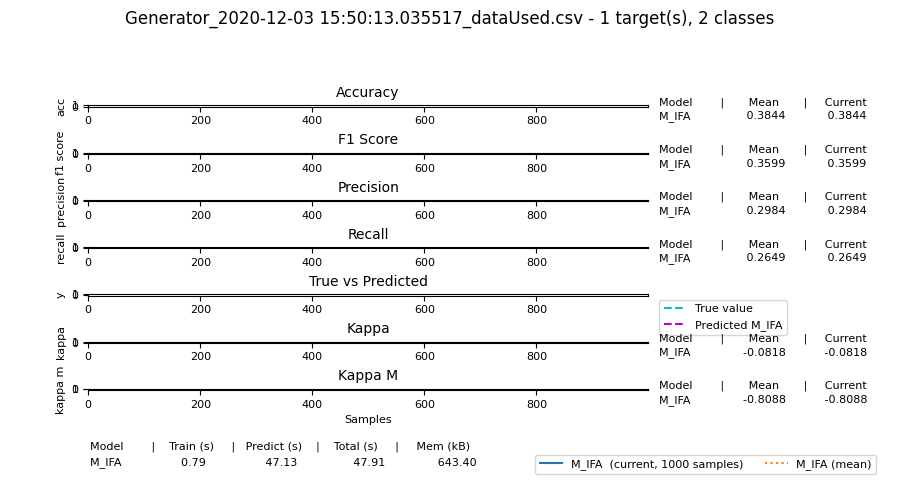

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.01s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ####---------------- [20%] [5.51s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ######-------------- [30%] [10.93s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ########------------ [40%] [16.26s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##########---------- [50%] [21.55s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ############-------- [60%] [26.71s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##############------ [70%] [32.03s]
The model was partially updated by training a sub new iForest with the version : MAnomaly

<IPython.core.display.Javascript object>


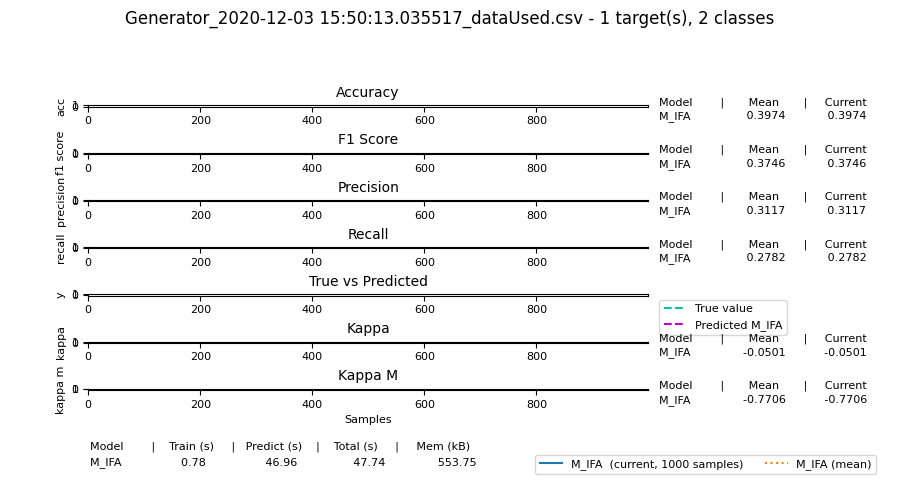

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.01s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ####---------------- [20%] [5.31s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ######-------------- [30%] [10.64s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ########------------ [40%] [15.95s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##########---------- [50%] [21.22s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ############-------- [60%] [26.60s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##############------ [70%] [31.85s]
The model was partially updated by training a sub new iForest with the version : MAnomaly

<IPython.core.display.Javascript object>


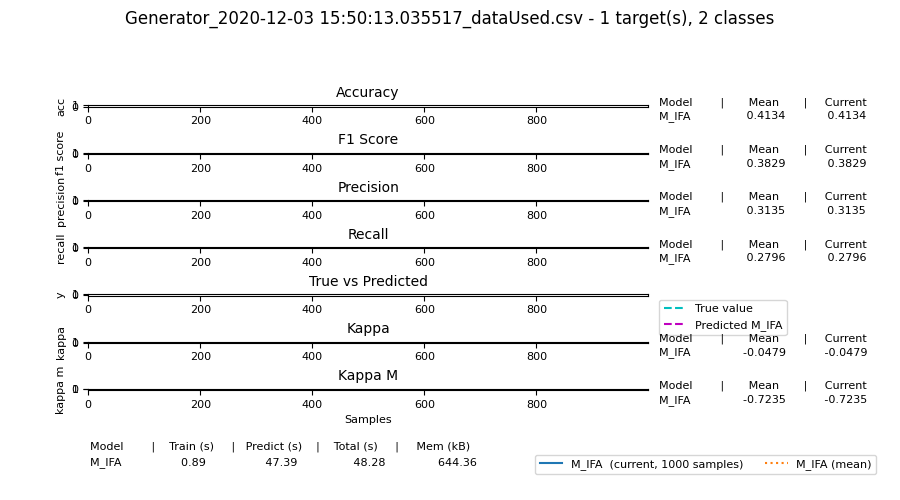

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.01s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ####---------------- [20%] [5.46s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ######-------------- [30%] [10.52s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ########------------ [40%] [16.04s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##########---------- [50%] [21.48s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ############-------- [60%] [27.03s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##############------ [70%] [32.47s]
The model was partially updated by training a sub new iForest with the version : MAnomaly

<IPython.core.display.Javascript object>


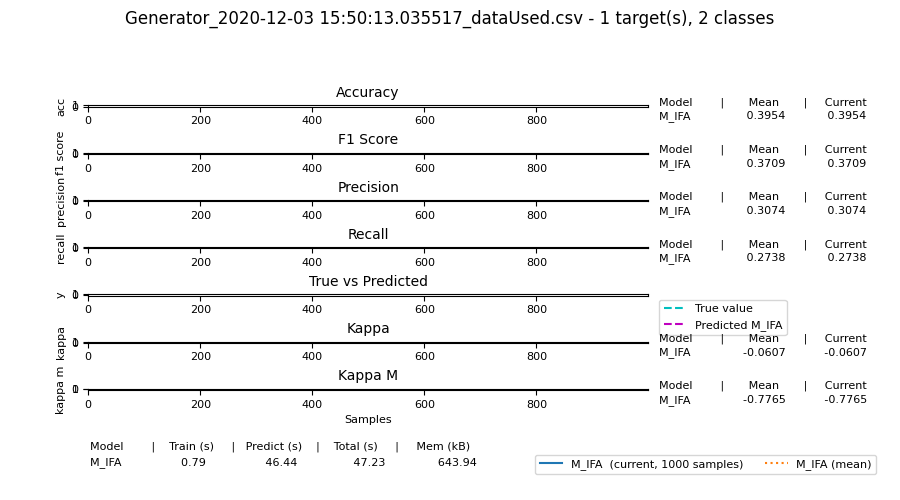

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.01s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ####---------------- [20%] [5.41s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ######-------------- [30%] [10.61s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ########------------ [40%] [15.94s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##########---------- [50%] [21.17s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ############-------- [60%] [26.45s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##############------ [70%] [31.74s]
The model was partially updated by training a sub new iForest with the version : MAnomaly

<IPython.core.display.Javascript object>


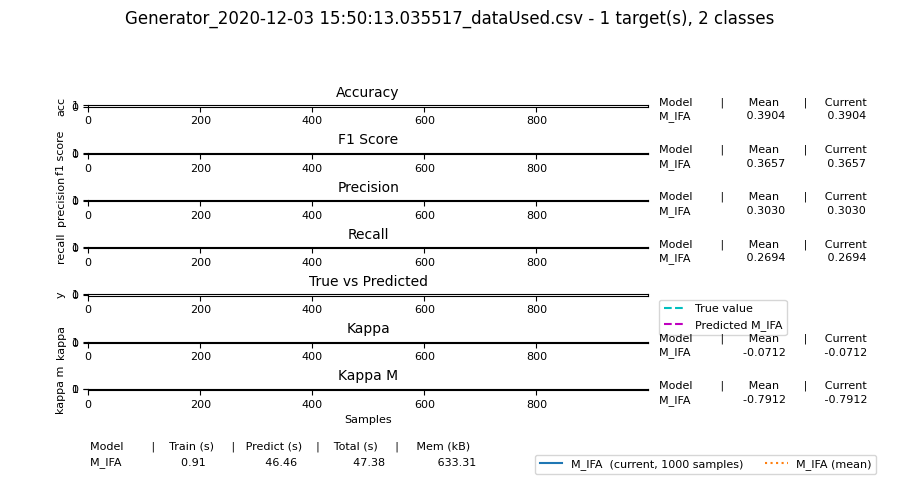

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.01s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ####---------------- [20%] [5.47s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ######-------------- [30%] [10.71s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ########------------ [40%] [16.00s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##########---------- [50%] [21.39s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ############-------- [60%] [26.66s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##############------ [70%] [31.80s]
The model was partially updated by training a sub new iForest with the version : MAnomaly

<IPython.core.display.Javascript object>


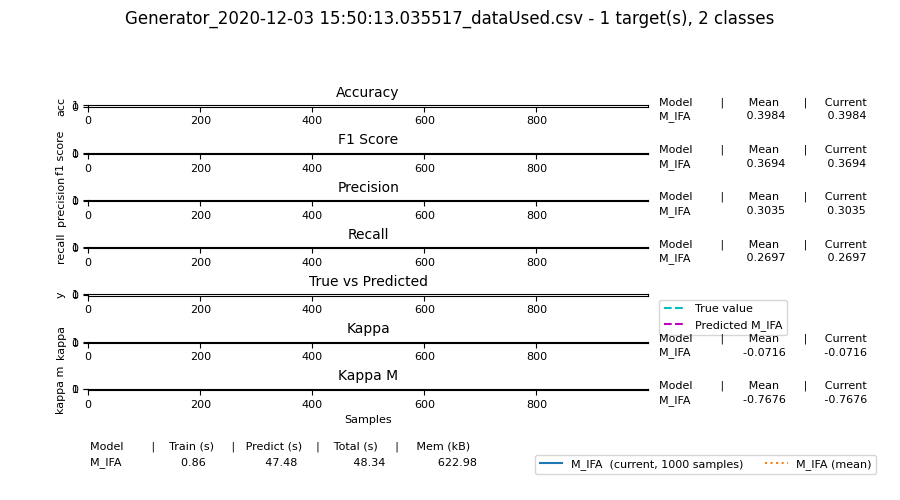

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.01s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ####---------------- [20%] [5.13s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ######-------------- [30%] [10.13s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ########------------ [40%] [15.55s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##########---------- [50%] [21.50s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ############-------- [60%] [26.88s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##############------ [70%] [32.27s]
The model was partially updated by training a sub new iForest with the version : MAnomaly

<IPython.core.display.Javascript object>


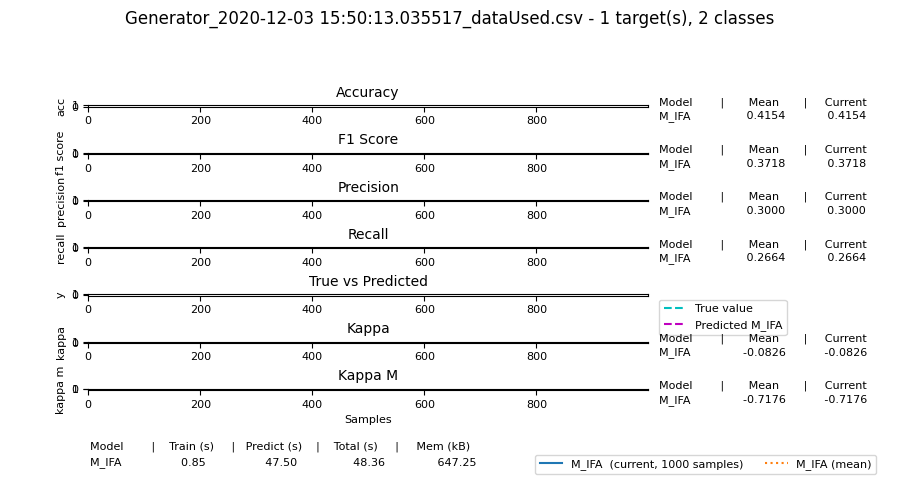

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.01s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ####---------------- [20%] [5.28s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ######-------------- [30%] [10.43s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ########------------ [40%] [15.66s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##########---------- [50%] [20.99s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ############-------- [60%] [26.47s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##############------ [70%] [32.08s]
The model was partially updated by training a sub new iForest with the version : MAnomaly

<IPython.core.display.Javascript object>


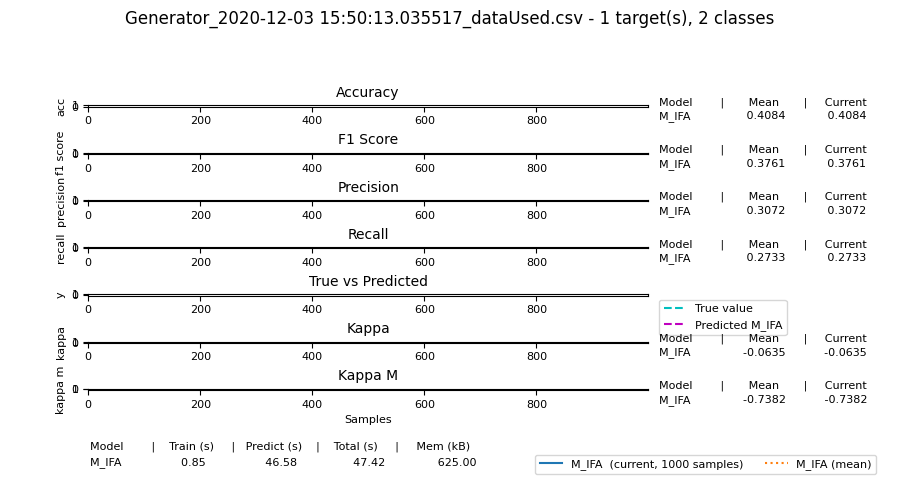

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.01s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ####---------------- [20%] [5.37s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ######-------------- [30%] [10.74s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ########------------ [40%] [16.10s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##########---------- [50%] [21.40s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ############-------- [60%] [26.64s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ##############------ [70%] [31.96s]
The model was partially updated by training a sub new iForest with the version : MAnomaly

In [18]:
dataset_name = "Generator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
#drift_rate = 0.1
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0,noise_percentage=0.1, random_state=1)

file_path = func.save_stream_data_generated(stream=stream, window = window, result_folder=test_name, window_number = window_number)
execute_comparision(file_path=file_path)

## Applied On Stream data containning anomalies
### Idea and waitting results
The idea of using a stream data with anomalies and without drift is to test both methods on a anomaly environnement.
Normally, SADWIN IForestASD or PADWIN IForestASD method will not update his model (It will be a good result) and it will have better or similar performances like Original IForestASD. The model_size and the total time can be upper than Orignal IForestASD ones because it take time to use ADWIN.
### Results
#### Model updating
- Original IForest ASD always update its model in every window because we give it the exact percentage of noise in every stream
- SADWIN update its model for the last-1 window
- PADWIN never update its model (This is the real waittng behavior)
#### Method performances

### Summary

1000

******************************** n_estimators_updated = 0.0 and Window = 256 and n_estimator = 100 ********************************
*************************************** Execution N° 0**********************************


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:181: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig = plt.figure(figsize=(9, 5))


<IPython.core.display.Javascript object>


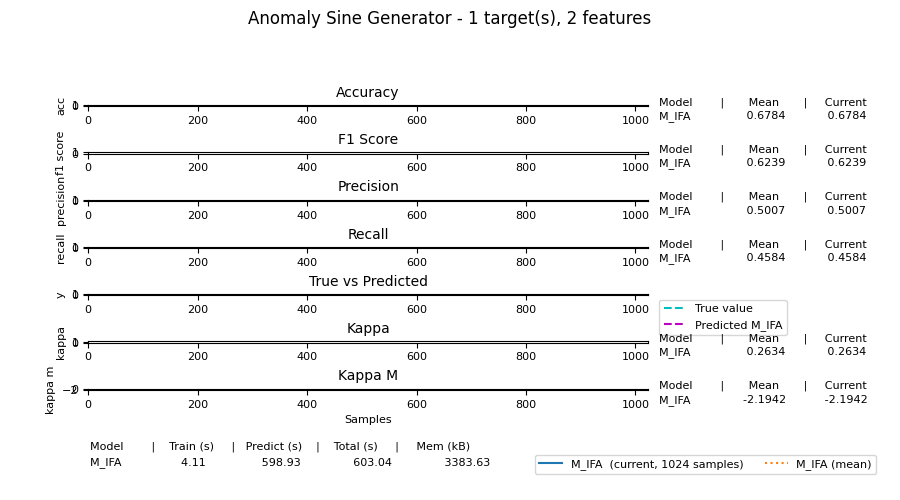

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ###############----- [75%] [462.69s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [603.14s]
Processed samples: 1024
Mean performance:
M_IFA - Accuracy     : 0.6784
M_IFA - Kappa        : 0.2634
M_IFA - Kappa M      : -2.1942
M_IFA - Precision: 0.5007
M_IFA - Recall: 0.4584
M_IFA - F1 score: 0.6239
M_IFA - Training time (s)  : 4.11
M_IFA - Testing time  (s)  : 598.93
M_IFA - Total time    (s)  : 603.04
M_IFA - Size (kB)          : 3383.6299

Please find the result on results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number0_for_WS256_NE100updated_count.csv

Please find evaluation results here results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number0_for_WS256_NE100.csv
*************************************** Execution N° 1**********************************


<IPython.core.display.Javascript object>


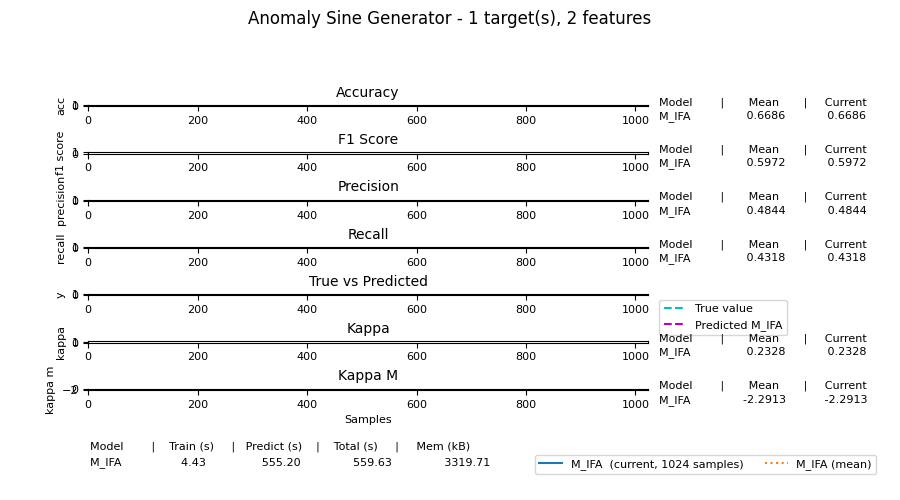

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ###############----- [75%] [404.65s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [559.73s]
Processed samples: 1024
Mean performance:
M_IFA - Accuracy     : 0.6686
M_IFA - Kappa        : 0.2328
M_IFA - Kappa M      : -2.2913
M_IFA - Precision: 0.4844
M_IFA - Recall: 0.4318
M_IFA - F1 score: 0.5972
M_IFA - Training time (s)  : 4.43
M_IFA - Testing time  (s)  : 555.20
M_IFA - Total time    (s)  : 559.63
M_IFA - Size (kB)          : 3319.7119

Please find the result on results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number1_for_WS256_NE100updated_count.csv

Please find evaluation results here results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number1_for_WS256_NE100.csv

******************************** n_estimators_updated = 0.1 and Window = 256 and n_estimator = 100 ****************************

<IPython.core.display.Javascript object>


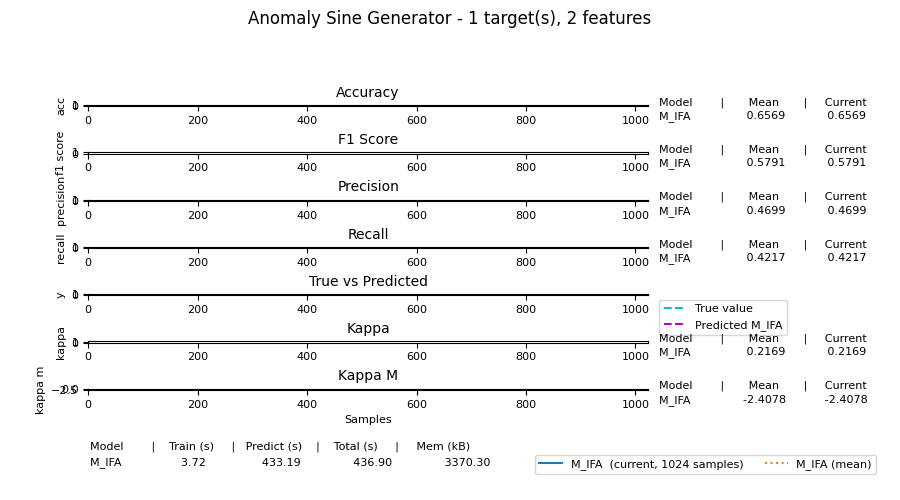

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##########---------- [50%] [146.82s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ###############----- [75%] [292.54s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [437.01s]
Processed samples: 1024
Mean performance:
M_IFA - Accuracy     : 0.6569
M_IFA - Kappa        : 0.2169
M_IFA - Kappa M      : -2.4078
M_IFA - Precision: 0.4699
M_IFA - Recall: 0.4217
M_IFA - F1 score: 0.5791
M_IFA - Training time (s)  : 3.72
M_IFA - Testing time  (s)  : 433.19
M_IFA - Total time    (s)  : 436.90
M_IFA - Size (kB)          : 3370.2979

Please find the result on results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number0_for_WS256_NE100updated_count.csv

Please find evaluation results here results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number0_for_WS256_NE100.

<IPython.core.display.Javascript object>


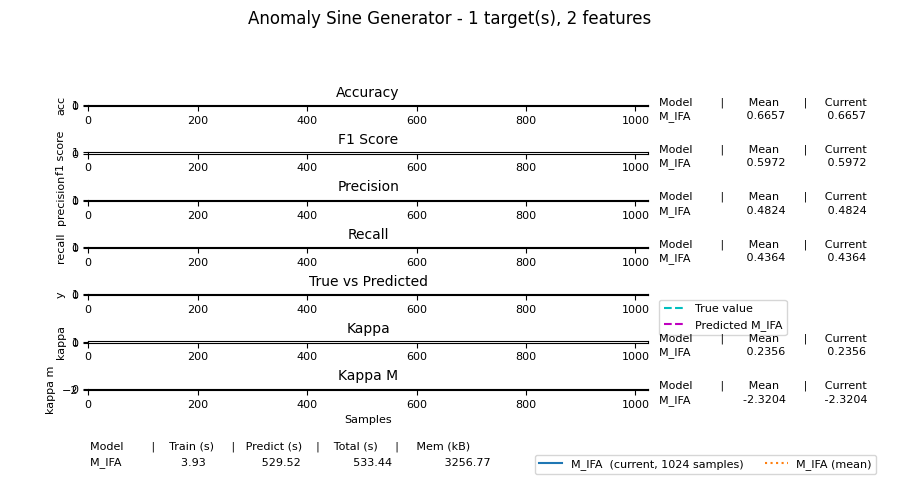

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ###############----- [75%] [396.53s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [533.54s]
Processed samples: 1024
Mean performance:
M_IFA - Accuracy     : 0.6657
M_IFA - Kappa        : 0.2356
M_IFA - Kappa M      : -2.3204
M_IFA - Precision: 0.4824
M_IFA - Recall: 0.4364
M_IFA - F1 score: 0.5972
M_IFA - Training time (s)  : 3.93
M_IFA - Testing time  (s)  : 529.52
M_IFA - Total time    (s)  : 533.44
M_IFA - Size (kB)          : 3256.7666

Please find the result on results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number1_for_WS256_NE100updated_count.csv

Please find evaluation results here results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number1_for_WS256_NE100.csv

******************************** n_estimators_updated = 0.2 and Window = 256 and n_estimator = 100 ****************************

<IPython.core.display.Javascript object>


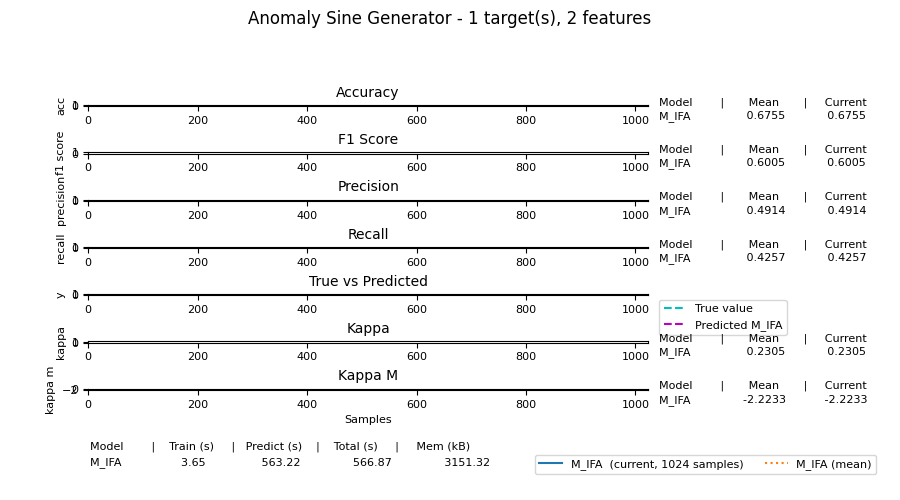

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ###############----- [75%] [421.70s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [566.96s]
Processed samples: 1024
Mean performance:
M_IFA - Accuracy     : 0.6755
M_IFA - Kappa        : 0.2305
M_IFA - Kappa M      : -2.2233
M_IFA - Precision: 0.4914
M_IFA - Recall: 0.4257
M_IFA - F1 score: 0.6005
M_IFA - Training time (s)  : 3.65
M_IFA - Testing time  (s)  : 563.22
M_IFA - Total time    (s)  : 566.87
M_IFA - Size (kB)          : 3151.3213

Please find the result on results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number0_for_WS256_NE100updated_count.csv

Please find evaluation results here results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number0_for_WS256_NE100.csv
*************************************** Execution N° 1**********************************


<IPython.core.display.Javascript object>


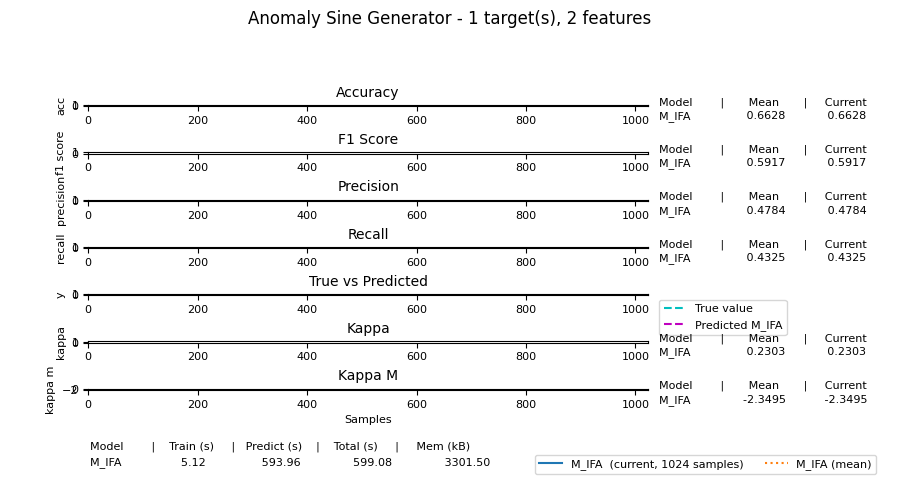

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.03s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ###############----- [75%] [443.76s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [599.20s]
Processed samples: 1024
Mean performance:
M_IFA - Accuracy     : 0.6628
M_IFA - Kappa        : 0.2303
M_IFA - Kappa M      : -2.3495
M_IFA - Precision: 0.4784
M_IFA - Recall: 0.4325
M_IFA - F1 score: 0.5917
M_IFA - Training time (s)  : 5.12
M_IFA - Testing time  (s)  : 593.96
M_IFA - Total time    (s)  : 599.08
M_IFA - Size (kB)          : 3301.4971

Please find the result on results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number1_for_WS256_NE100updated_count.csv

Please find evaluation results here results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number1_for_WS256_NE100.cs

<IPython.core.display.Javascript object>


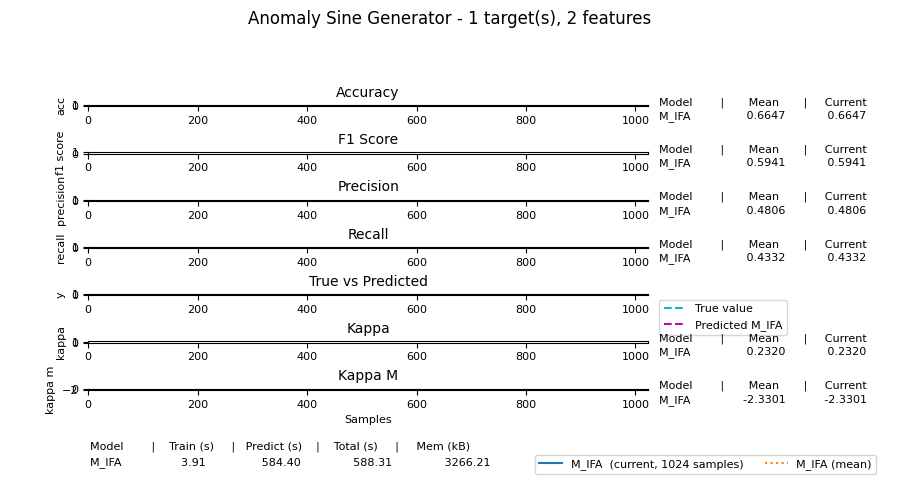

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ###############----- [75%] [442.76s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [588.40s]
Processed samples: 1024
Mean performance:
M_IFA - Accuracy     : 0.6647
M_IFA - Kappa        : 0.2320
M_IFA - Kappa M      : -2.3301
M_IFA - Precision: 0.4806
M_IFA - Recall: 0.4332
M_IFA - F1 score: 0.5941
M_IFA - Training time (s)  : 3.91
M_IFA - Testing time  (s)  : 584.40
M_IFA - Total time    (s)  : 588.31
M_IFA - Size (kB)          : 3266.2119

Please find the result on results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number0_for_WS256_NE100updated_count.csv

Please find evaluation results here results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number0_for_WS256_NE100.csv
*************************************** Execution N° 1**********************************


<IPython.core.display.Javascript object>


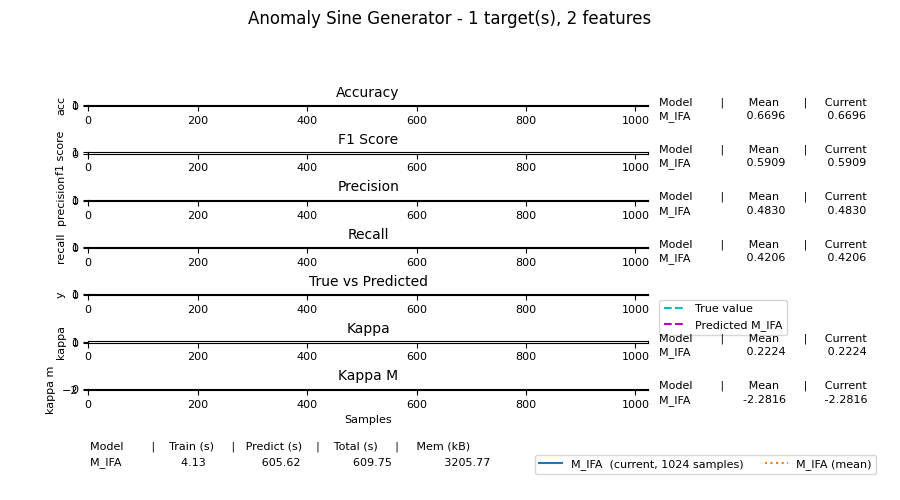

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.03s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ###############----- [75%] [462.32s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [609.86s]
Processed samples: 1024
Mean performance:
M_IFA - Accuracy     : 0.6696
M_IFA - Kappa        : 0.2224
M_IFA - Kappa M      : -2.2816
M_IFA - Precision: 0.4830
M_IFA - Recall: 0.4206
M_IFA - F1 score: 0.5909
M_IFA - Training time (s)  : 4.13
M_IFA - Testing time  (s)  : 605.62
M_IFA - Total time    (s)  : 609.75
M_IFA - Size (kB)          : 3205.7705

Please find the result on results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number1_for_WS256_NE100updated_count.csv

Please find evaluation results here results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number1_for_WS256_NE100.cs

<IPython.core.display.Javascript object>


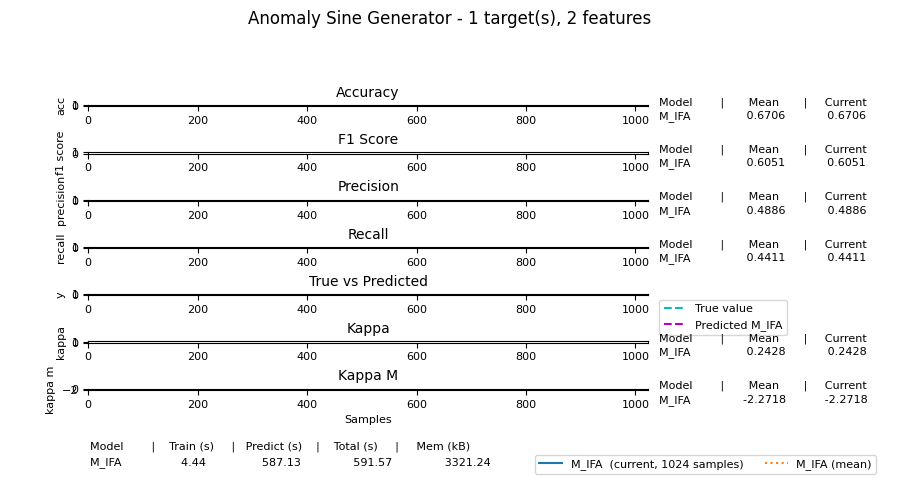

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ###############----- [75%] [451.22s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [591.68s]
Processed samples: 1024
Mean performance:
M_IFA - Accuracy     : 0.6706
M_IFA - Kappa        : 0.2428
M_IFA - Kappa M      : -2.2718
M_IFA - Precision: 0.4886
M_IFA - Recall: 0.4411
M_IFA - F1 score: 0.6051
M_IFA - Training time (s)  : 4.44
M_IFA - Testing time  (s)  : 587.13
M_IFA - Total time    (s)  : 591.57
M_IFA - Size (kB)          : 3321.2393

Please find the result on results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number0_for_WS256_NE100updated_count.csv

Please find evaluation results here results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number0_for_WS256_NE100.csv
*************************************** Execution N° 1**********************************


<IPython.core.display.Javascript object>


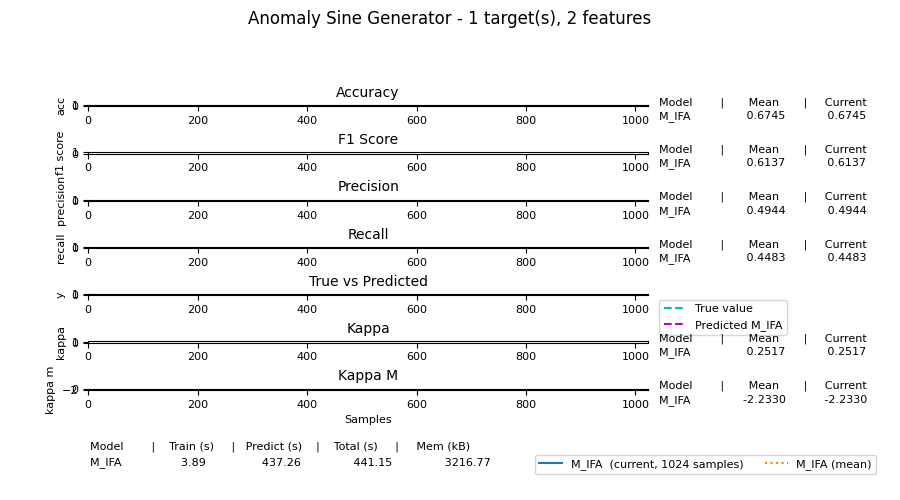

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##########---------- [50%] [145.97s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 ###############----- [75%] [292.85s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [441.24s]
Processed samples: 1024
Mean performance:
M_IFA - Accuracy     : 0.6745
M_IFA - Kappa        : 0.2517
M_IFA - Kappa M      : -2.2330
M_IFA - Precision: 0.4944
M_IFA - Recall: 0.4483
M_IFA - F1 score: 0.6137
M_IFA - Training time (s)  : 3.89
M_IFA - Testing time  (s)  : 437.26
M_IFA - Total time    (s)  : 441.15
M_IFA - Size (kB)          : 3216.7705

Please find the result on results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number1_for_WS256_NE100updated_count.csv

Please find evaluation results here results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number1_for_WS256_NE100.

<IPython.core.display.Javascript object>


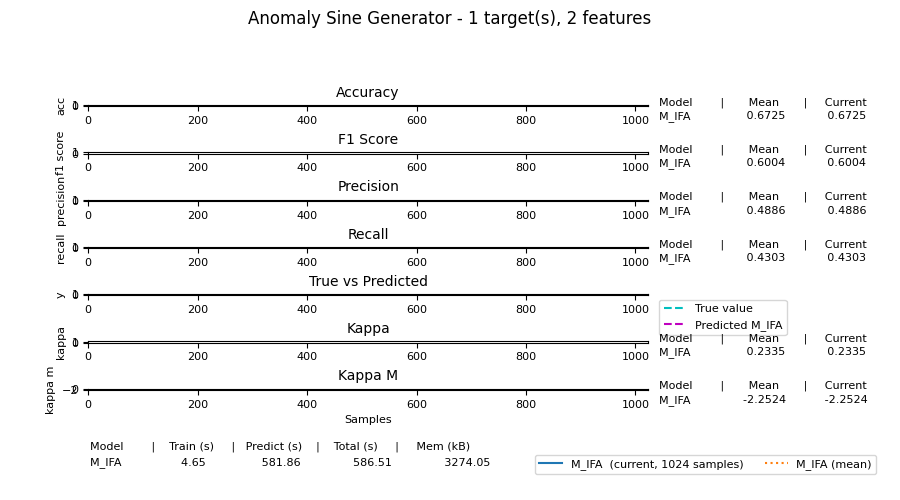

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ###############----- [75%] [433.95s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [586.62s]
Processed samples: 1024
Mean performance:
M_IFA - Accuracy     : 0.6725
M_IFA - Kappa        : 0.2335
M_IFA - Kappa M      : -2.2524
M_IFA - Precision: 0.4886
M_IFA - Recall: 0.4303
M_IFA - F1 score: 0.6004
M_IFA - Training time (s)  : 4.65
M_IFA - Testing time  (s)  : 581.86
M_IFA - Total time    (s)  : 586.51
M_IFA - Size (kB)          : 3274.0479

Please find the result on results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number0_for_WS256_NE100updated_count.csv

Please find evaluation results here results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number0_for_WS256_NE100.csv
*************************************** Execution N° 1**********************************


<IPython.core.display.Javascript object>


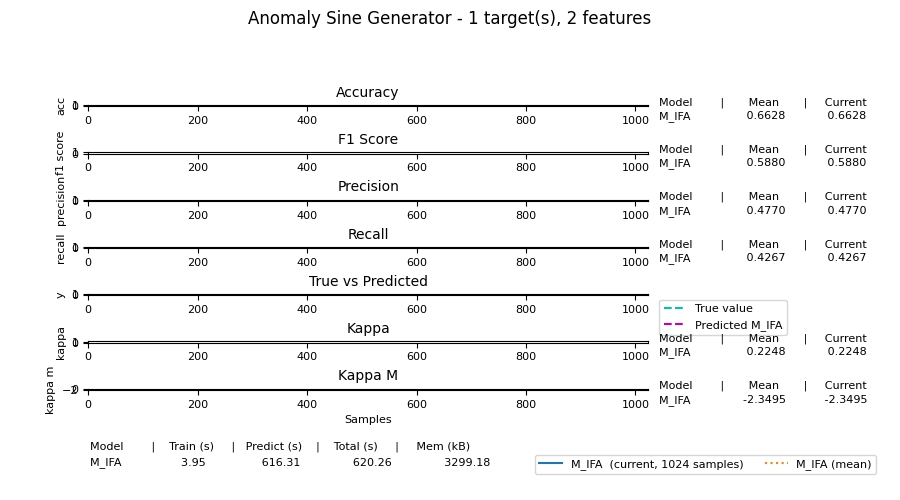

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ###############----- [75%] [461.87s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [620.36s]
Processed samples: 1024
Mean performance:
M_IFA - Accuracy     : 0.6628
M_IFA - Kappa        : 0.2248
M_IFA - Kappa M      : -2.3495
M_IFA - Precision: 0.4770
M_IFA - Recall: 0.4267
M_IFA - F1 score: 0.5880
M_IFA - Training time (s)  : 3.95
M_IFA - Testing time  (s)  : 616.31
M_IFA - Total time    (s)  : 620.26
M_IFA - Size (kB)          : 3299.1846

Please find the result on results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number1_for_WS256_NE100updated_count.csv

Please find evaluation results here results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number1_for_WS256_NE100.csv

******************************** n_estimators_updated = 0.6000000000000001 and Window = 256 and n_estimator = 100 *************

<IPython.core.display.Javascript object>


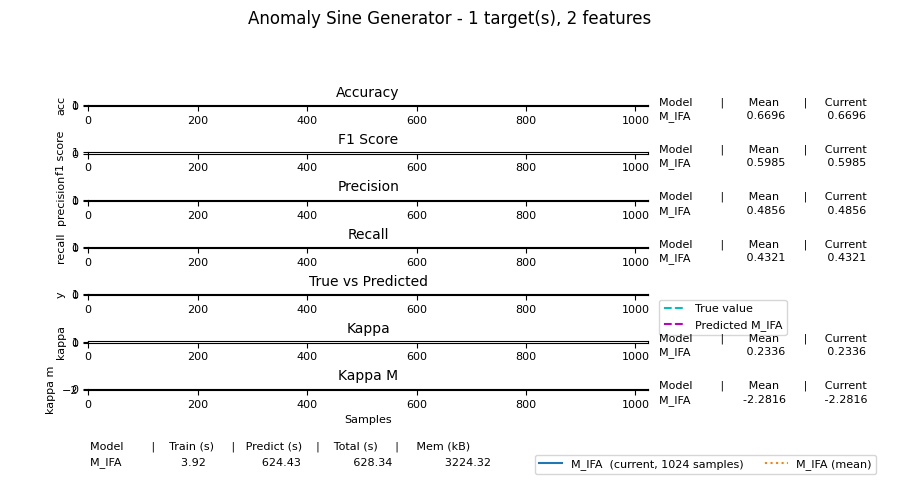

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ###############----- [75%] [467.82s]
The model was partially updated by training a sub new iForest with the version : MAnomalyRate
 #################### [100%] [628.45s]
Processed samples: 1024
Mean performance:
M_IFA - Accuracy     : 0.6696
M_IFA - Kappa        : 0.2336
M_IFA - Kappa M      : -2.2816
M_IFA - Precision: 0.4856
M_IFA - Recall: 0.4321
M_IFA - F1 score: 0.5985
M_IFA - Training time (s)  : 3.92
M_IFA - Testing time  (s)  : 624.43
M_IFA - Total time    (s)  : 628.34
M_IFA - Size (kB)          : 3224.3213

Please find the result on results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number0_for_WS256_NE100updated_count.csv

Please find evaluation results here results/AnomalySineGenerator_2020-11-26 22:35:01.131156/result_Number0_for_WS256_NE100.csv
*************************************** Execution N° 1**********************************


<IPython.core.display.Javascript object>

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##############------ [70%] [391.74s]

In [ ]:
dataset_name = "AnomalySineGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.1
n_samples=10000
anomalies_percentage = 0.1
n_anomalies= int(n_samples*anomalies_percentage)
print(str(n_anomalies))
stream = func.get_anomalies_data_generated(n_samples=n_samples, n_anomalies=n_anomalies, contextual=False,
                 n_contextual=0.0, shift=4, noise=0.1, replace=True, random_state=None)

#func.save_stream_data_generated(stream=stream, window = window, result_folder=test_name, window_number = window_number)
execute_comparision()

## Applied On Simple ConceptDrift Stream Dataset

### When drift start one window and is in the window

In [ ]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.0
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.0, random_state=1,
                         drift_classification_function = 5, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 513, drift_width = 100, n_num_features = 2, n_cat_features = 0)

#func.save_stream_data_generated(stream=stream, window = window, result_folder=test_name, window_number=window_number)
execute_comparision()

## When drift is in one window and don't start the window

In [ ]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.0
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.0, random_state=1,
                         drift_classification_function = 3, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 523, drift_width = 100, n_num_features = 2, n_cat_features = 0)

#func.save_stream_data_generated(stream=stream, window = window, result_folder=test_name, window_number=window_number)
execute_comparision()

## When drift don't start a window but is between two windows

In [ ]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.0
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.0, random_state=1,
                         drift_classification_function = 3, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 384, drift_width = 100, n_num_features = 2, n_cat_features = 0)

#func.save_stream_data_generated(stream=stream, window = window, result_folder=test_name, window_number=window_number)
execute_comparision()